# 1. Read dataset and import library:

In [18]:
#import library
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
#read data
data = pd.read_csv('./Iris.csv')
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
32,33,5.2,4.1,1.5,0.1,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
27,28,5.2,3.5,1.5,0.2,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica
36,37,5.5,3.5,1.3,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica


In [20]:
#How many species in our data?
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We want to show that when we apply regression model into this dataset, it will return the correct label of each kind (based on all numerical features).

We can see that the "PetalWidth" is an obvious trait to identify 1 label with the other 2. 

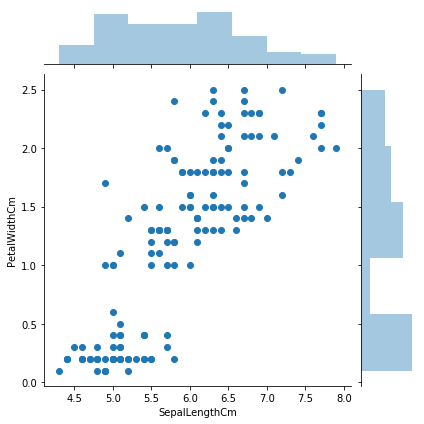

In [63]:
sns.jointplot('SepalLengthCm','PetalWidthCm',data = data)

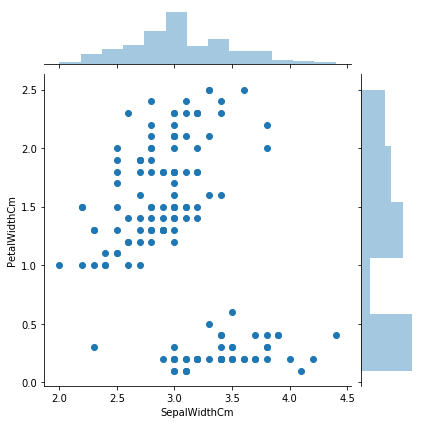

In [61]:
sns.jointplot('SepalWidthCm','PetalWidthCm',data = data)

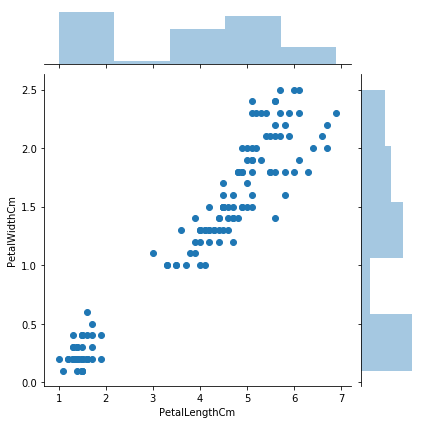

In [62]:
sns.jointplot('PetalLengthCm','PetalWidthCm',data = data)

When we plot it with other numerical data, an obvious line has been shown. It differentiate one label with the other two. I assume that when we apply regression model into this dataset, the accuracy score would be high due to the simpleness of the data.

# 2. Build model:

In [29]:
#Defines X,y for train_test_split
X = data.drop(columns=['Species','Id']).values
y = data['Species'].values

In [32]:
#train_test_split, test size 25%, random state = 101
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=68)

In [34]:
#Defines RandomForest, DecisionTree, Logistic Regression
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()

In [35]:
#Fit and train model:
rfc.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
lr.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
rfc_predict = rfc.predict(X_test)
dtc_predict = dtc.predict(X_test)
lr_predict = lr.predict(X_test)

# 3. Evaluate model:

In [43]:
#RandomForest accuracy score:
accuracy_score(y_test,rfc_predict)

0.9736842105263158

In [44]:
#DecisionTree accuracy score:
accuracy_score(y_test,dtc_predict)

1.0

In [45]:
#LogisticRegression accuracy score:
accuracy_score(y_test,lr_predict)

1.0

All accuracy score is unsual high? Let see what happened when we use other indicator (confusion matrix).

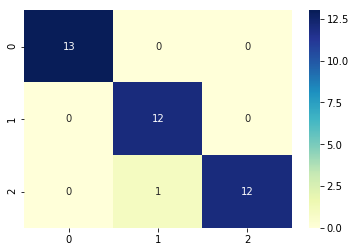

In [47]:
#RandomForest:
sns.heatmap(confusion_matrix(y_test,rfc_predict),cmap="YlGnBu",annot=True,fmt="d")

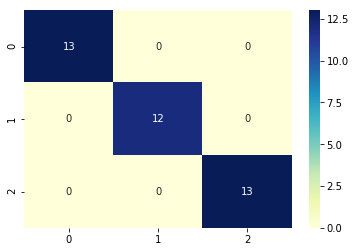

In [48]:
#DecisionTree:
sns.heatmap(confusion_matrix(y_test,dtc_predict),cmap="YlGnBu",annot=True,fmt="d")

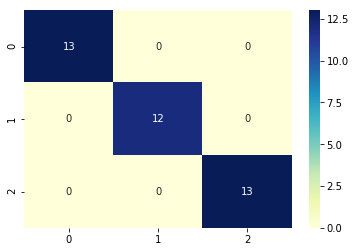

In [49]:
sns.heatmap(confusion_matrix(y_test,lr_predict),cmap="YlGnBu",annot=True,fmt="d")

All three models seem to reach unsual high accuracy scores? I assume that since the set data is small, the model can train and return with such high accuracy score. And another reason is that the data is quite simple with one label completely split from the other two.

In conclusion, although I had assumed that the accuracy when we apply regression model to this dataset would be high, I'm still surprised with the result. 